<a href="https://colab.research.google.com/github/SandhyaReddy3017/FMML_PROJECT_AND_LABS/blob/main/FMML_Aug'22_M9_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

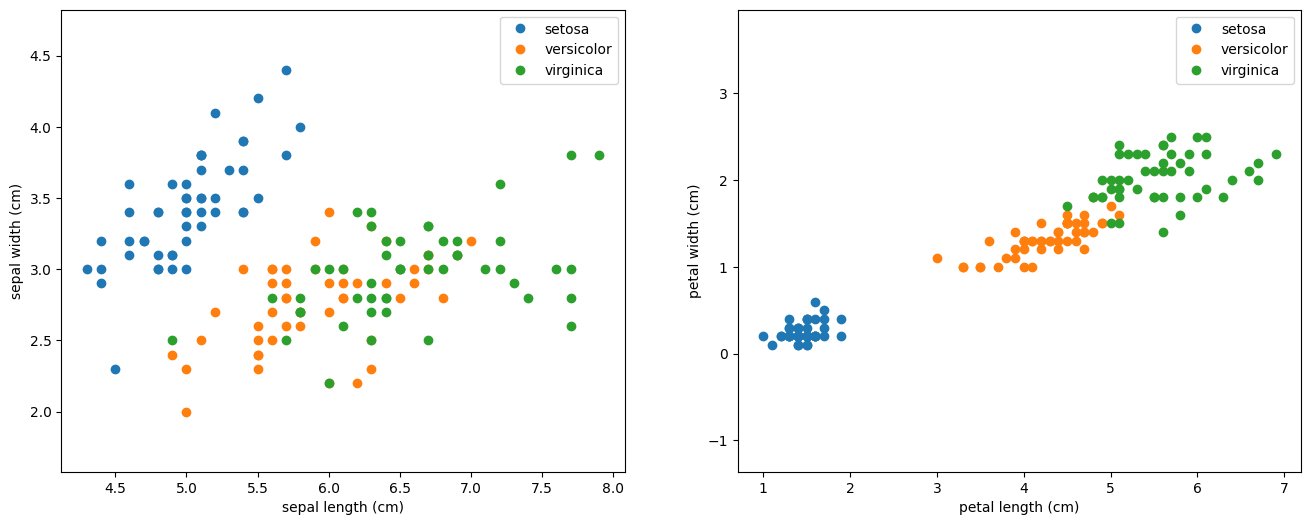

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [5]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [6]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [7]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [8]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 297.83it/s]


# Plot training progress

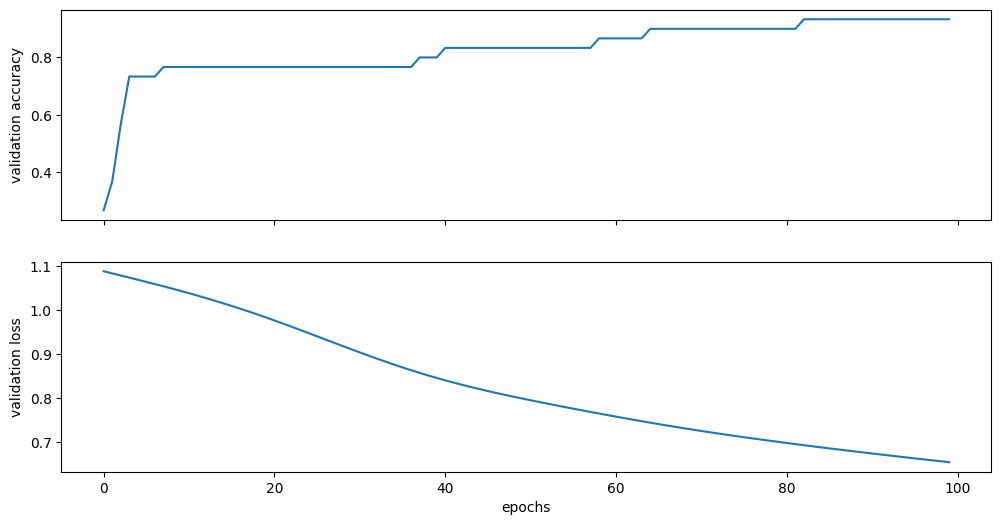

In [9]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

**ANSWER FO RQUESTION 1 :**

In [10]:
import numpy as np
from sklearn.neural_network import MLPClassifier


In [11]:
# Define input features
X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])

# Define outputs for each logic gate using -1/+1 logic
y_and = np.array([-1, -1, -1, 1])  # AND gate
y_or = np.array([-1, 1, 1, 1])     # OR gate
y_nor = np.array([1, -1, -1, -1])  # NOR gate
y_nand = np.array([1, 1, 1, -1])   # NAND gate
y_xor = np.array([-1, 1, 1, -1])   # XOR gate


Train and Evaluate MLP with Different Number of Hidden Layers:
We will train the MLP with 1, 2, and 3 hidden layers and see how it performs.

MLP with 1 Hidden Layer:


In [12]:
def train_and_evaluate_mlp_one_hidden_layer(X, y, gate_name):
    mlp = MLPClassifier(hidden_layer_sizes=(4,), max_iter=1000, activation='tanh', solver='adam', random_state=1)
    mlp.fit(X, y)
    predictions = mlp.predict(X)
    print(f"{gate_name} gate (MLP with 1 hidden layer) results:")
    print("Input\tOutput\tPredicted")
    for i in range(len(X)):
        print(f"{X[i]}\t{y[i]}\t{predictions[i]}")
    print()

# Train and evaluate MLP with 1 hidden layer for each logic gate
train_and_evaluate_mlp_one_hidden_layer(X, y_and, 'AND')
train_and_evaluate_mlp_one_hidden_layer(X, y_or, 'OR')
train_and_evaluate_mlp_one_hidden_layer(X, y_nor, 'NOR')
train_and_evaluate_mlp_one_hidden_layer(X, y_nand, 'NAND')
train_and_evaluate_mlp_one_hidden_layer(X, y_xor, 'XOR')


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


AND gate (MLP with 1 hidden layer) results:
Input	Output	Predicted
[-1 -1]	-1	-1
[-1  1]	-1	-1
[ 1 -1]	-1	-1
[1 1]	1	1

OR gate (MLP with 1 hidden layer) results:
Input	Output	Predicted
[-1 -1]	-1	-1
[-1  1]	1	1
[ 1 -1]	1	1
[1 1]	1	1



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


NOR gate (MLP with 1 hidden layer) results:
Input	Output	Predicted
[-1 -1]	1	1
[-1  1]	-1	-1
[ 1 -1]	-1	-1
[1 1]	-1	-1



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


NAND gate (MLP with 1 hidden layer) results:
Input	Output	Predicted
[-1 -1]	1	1
[-1  1]	1	1
[ 1 -1]	1	1
[1 1]	-1	-1

XOR gate (MLP with 1 hidden layer) results:
Input	Output	Predicted
[-1 -1]	-1	-1
[-1  1]	1	1
[ 1 -1]	1	1
[1 1]	-1	-1



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [13]:
def train_and_evaluate_mlp_two_hidden_layers(X, y, gate_name):
    mlp = MLPClassifier(hidden_layer_sizes=(4, 4), max_iter=1000, activation='tanh', solver='adam', random_state=1)
    mlp.fit(X, y)
    predictions = mlp.predict(X)
    print(f"{gate_name} gate (MLP with 2 hidden layers) results:")
    print("Input\tOutput\tPredicted")
    for i in range(len(X)):
        print(f"{X[i]}\t{y[i]}\t{predictions[i]}")
    print()

# Train and evaluate MLP with 2 hidden layers for each logic gate
train_and_evaluate_mlp_two_hidden_layers(X, y_and, 'AND')
train_and_evaluate_mlp_two_hidden_layers(X, y_or, 'OR')
train_and_evaluate_mlp_two_hidden_layers(X, y_nor, 'NOR')
train_and_evaluate_mlp_two_hidden_layers(X, y_nand, 'NAND')
train_and_evaluate_mlp_two_hidden_layers(X, y_xor, 'XOR')


AND gate (MLP with 2 hidden layers) results:
Input	Output	Predicted
[-1 -1]	-1	-1
[-1  1]	-1	-1
[ 1 -1]	-1	-1
[1 1]	1	1

OR gate (MLP with 2 hidden layers) results:
Input	Output	Predicted
[-1 -1]	-1	-1
[-1  1]	1	1
[ 1 -1]	1	1
[1 1]	1	1

NOR gate (MLP with 2 hidden layers) results:
Input	Output	Predicted
[-1 -1]	1	1
[-1  1]	-1	-1
[ 1 -1]	-1	-1
[1 1]	-1	-1

NAND gate (MLP with 2 hidden layers) results:
Input	Output	Predicted
[-1 -1]	1	1
[-1  1]	1	1
[ 1 -1]	1	1
[1 1]	-1	-1

XOR gate (MLP with 2 hidden layers) results:
Input	Output	Predicted
[-1 -1]	-1	-1
[-1  1]	1	1
[ 1 -1]	1	1
[1 1]	-1	-1



**ANSWER FOR QUESTION 2 :**

Train and Evaluate MLP with Different Number of Neurons:
We will train the MLP with 2, 4, and 8 neurons in the hidden layer and see how it performs.

MLP with 2 Neurons in the Hidden Layer:


In [14]:
def train_and_evaluate_mlp_two_neurons(X, y, gate_name):
    mlp = MLPClassifier(hidden_layer_sizes=(2,), max_iter=1000, activation='tanh', solver='adam', random_state=1)
    mlp.fit(X, y)
    predictions = mlp.predict(X)
    print(f"{gate_name} gate (MLP with 2 neurons) results:")
    print("Input\tOutput\tPredicted")
    for i in range(len(X)):
        print(f"{X[i]}\t{y[i]}\t{predictions[i]}")
    print()

# Train and evaluate MLP with 2 neurons for each logic gate
train_and_evaluate_mlp_two_neurons(X, y_and, 'AND')
train_and_evaluate_mlp_two_neurons(X, y_or, 'OR')
train_and_evaluate_mlp_two_neurons(X, y_nor, 'NOR')
train_and_evaluate_mlp_two_neurons(X, y_nand, 'NAND')
train_and_evaluate_mlp_two_neurons(X, y_xor, 'XOR')


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


AND gate (MLP with 2 neurons) results:
Input	Output	Predicted
[-1 -1]	-1	-1
[-1  1]	-1	-1
[ 1 -1]	-1	-1
[1 1]	1	1



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


OR gate (MLP with 2 neurons) results:
Input	Output	Predicted
[-1 -1]	-1	-1
[-1  1]	1	1
[ 1 -1]	1	1
[1 1]	1	1



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


NOR gate (MLP with 2 neurons) results:
Input	Output	Predicted
[-1 -1]	1	1
[-1  1]	-1	-1
[ 1 -1]	-1	-1
[1 1]	-1	-1



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


NAND gate (MLP with 2 neurons) results:
Input	Output	Predicted
[-1 -1]	1	1
[-1  1]	1	1
[ 1 -1]	1	1
[1 1]	-1	-1

XOR gate (MLP with 2 neurons) results:
Input	Output	Predicted
[-1 -1]	-1	-1
[-1  1]	1	1
[ 1 -1]	1	1
[1 1]	-1	1



In [15]:
def train_and_evaluate_mlp_four_neurons(X, y, gate_name):
    mlp = MLPClassifier(hidden_layer_sizes=(4,), max_iter=1000, activation='tanh', solver='adam', random_state=1)
    mlp.fit(X, y)
    predictions = mlp.predict(X)
    print(f"{gate_name} gate (MLP with 4 neurons) results:")
    print("Input\tOutput\tPredicted")
    for i in range(len(X)):
        print(f"{X[i]}\t{y[i]}\t{predictions[i]}")
    print()

# Train and evaluate MLP with 4 neurons for each logic gate
train_and_evaluate_mlp_four_neurons(X, y_and, 'AND')
train_and_evaluate_mlp_four_neurons(X, y_or, 'OR')
train_and_evaluate_mlp_four_neurons(X, y_nor, 'NOR')
train_and_evaluate_mlp_four_neurons(X, y_nand, 'NAND')
train_and_evaluate_mlp_four_neurons(X, y_xor, 'XOR')


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


AND gate (MLP with 4 neurons) results:
Input	Output	Predicted
[-1 -1]	-1	-1
[-1  1]	-1	-1
[ 1 -1]	-1	-1
[1 1]	1	1

OR gate (MLP with 4 neurons) results:
Input	Output	Predicted
[-1 -1]	-1	-1
[-1  1]	1	1
[ 1 -1]	1	1
[1 1]	1	1



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


NOR gate (MLP with 4 neurons) results:
Input	Output	Predicted
[-1 -1]	1	1
[-1  1]	-1	-1
[ 1 -1]	-1	-1
[1 1]	-1	-1



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


NAND gate (MLP with 4 neurons) results:
Input	Output	Predicted
[-1 -1]	1	1
[-1  1]	1	1
[ 1 -1]	1	1
[1 1]	-1	-1

XOR gate (MLP with 4 neurons) results:
Input	Output	Predicted
[-1 -1]	-1	-1
[-1  1]	1	1
[ 1 -1]	1	1
[1 1]	-1	-1



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


**ANSWER FOR QUESTION 3 :**

Train and Evaluate MLP with Different Activation Functions:
MLP with ReLU Activation Function

In [16]:
def train_and_evaluate_mlp_relu(X, y, gate_name):
    mlp = MLPClassifier(hidden_layer_sizes=(4,), max_iter=1000, activation='relu', solver='adam', random_state=1)
    mlp.fit(X, y)
    predictions = mlp.predict(X)
    print(f"{gate_name} gate (MLP with ReLU activation) results:")
    print("Input\tOutput\tPredicted")
    for i in range(len(X)):
        print(f"{X[i]}\t{y[i]}\t{predictions[i]}")
    print()

# Train and evaluate MLP with ReLU activation for each logic gate
train_and_evaluate_mlp_relu(X, y_and, 'AND')
train_and_evaluate_mlp_relu(X, y_or, 'OR')
train_and_evaluate_mlp_relu(X, y_nor, 'NOR')
train_and_evaluate_mlp_relu(X, y_nand, 'NAND')
train_and_evaluate_mlp_relu(X, y_xor, 'XOR')


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


AND gate (MLP with ReLU activation) results:
Input	Output	Predicted
[-1 -1]	-1	-1
[-1  1]	-1	-1
[ 1 -1]	-1	-1
[1 1]	1	1

OR gate (MLP with ReLU activation) results:
Input	Output	Predicted
[-1 -1]	-1	-1
[-1  1]	1	1
[ 1 -1]	1	1
[1 1]	1	1



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


NOR gate (MLP with ReLU activation) results:
Input	Output	Predicted
[-1 -1]	1	1
[-1  1]	-1	-1
[ 1 -1]	-1	-1
[1 1]	-1	-1



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


NAND gate (MLP with ReLU activation) results:
Input	Output	Predicted
[-1 -1]	1	1
[-1  1]	1	1
[ 1 -1]	1	1
[1 1]	-1	-1

XOR gate (MLP with ReLU activation) results:
Input	Output	Predicted
[-1 -1]	-1	-1
[-1  1]	1	1
[ 1 -1]	1	1
[1 1]	-1	-1



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP with Logistic (Sigmoid) Activation Function:


In [17]:
def train_and_evaluate_mlp_logistic(X, y, gate_name):
    mlp = MLPClassifier(hidden_layer_sizes=(4,), max_iter=1000, activation='logistic', solver='adam', random_state=1)
    mlp.fit(X, y)
    predictions = mlp.predict(X)
    print(f"{gate_name} gate (MLP with Logistic activation) results:")
    print("Input\tOutput\tPredicted")
    for i in range(len(X)):
        print(f"{X[i]}\t{y[i]}\t{predictions[i]}")
    print()

# Train and evaluate MLP with Logistic activation for each logic gate
train_and_evaluate_mlp_logistic(X, y_and, 'AND')
train_and_evaluate_mlp_logistic(X, y_or, 'OR')
train_and_evaluate_mlp_logistic(X, y_nor, 'NOR')
train_and_evaluate_mlp_logistic(X, y_nand, 'NAND')
train_and_evaluate_mlp_logistic(X, y_xor, 'XOR')


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


AND gate (MLP with Logistic activation) results:
Input	Output	Predicted
[-1 -1]	-1	-1
[-1  1]	-1	-1
[ 1 -1]	-1	-1
[1 1]	1	1



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


OR gate (MLP with Logistic activation) results:
Input	Output	Predicted
[-1 -1]	-1	-1
[-1  1]	1	1
[ 1 -1]	1	1
[1 1]	1	1



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


NOR gate (MLP with Logistic activation) results:
Input	Output	Predicted
[-1 -1]	1	1
[-1  1]	-1	-1
[ 1 -1]	-1	-1
[1 1]	-1	-1

NAND gate (MLP with Logistic activation) results:
Input	Output	Predicted
[-1 -1]	1	1
[-1  1]	1	1
[ 1 -1]	1	1
[1 1]	-1	1

XOR gate (MLP with Logistic activation) results:
Input	Output	Predicted
[-1 -1]	-1	-1
[-1  1]	1	-1
[ 1 -1]	1	1
[1 1]	-1	1



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP with Tanh Activation Function:


In [18]:
def train_and_evaluate_mlp_tanh(X, y, gate_name):
    mlp = MLPClassifier(hidden_layer_sizes=(4,), max_iter=1000, activation='tanh', solver='adam', random_state=1)
    mlp.fit(X, y)
    predictions = mlp.predict(X)
    print(f"{gate_name} gate (MLP with Tanh activation) results:")
    print("Input\tOutput\tPredicted")
    for i in range(len(X)):
        print(f"{X[i]}\t{y[i]}\t{predictions[i]}")
    print()

# Train and evaluate MLP with Tanh activation for each logic gate
train_and_evaluate_mlp_tanh(X, y_and, 'AND')
train_and_evaluate_mlp_tanh(X, y_or, 'OR')
train_and_evaluate_mlp_tanh(X, y_nor, 'NOR')
train_and_evaluate_mlp_tanh(X, y_nand, 'NAND')
train_and_evaluate_mlp_tanh(X, y_xor, 'XOR')


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


AND gate (MLP with Tanh activation) results:
Input	Output	Predicted
[-1 -1]	-1	-1
[-1  1]	-1	-1
[ 1 -1]	-1	-1
[1 1]	1	1

OR gate (MLP with Tanh activation) results:
Input	Output	Predicted
[-1 -1]	-1	-1
[-1  1]	1	1
[ 1 -1]	1	1
[1 1]	1	1



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


NOR gate (MLP with Tanh activation) results:
Input	Output	Predicted
[-1 -1]	1	1
[-1  1]	-1	-1
[ 1 -1]	-1	-1
[1 1]	-1	-1



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


NAND gate (MLP with Tanh activation) results:
Input	Output	Predicted
[-1 -1]	1	1
[-1  1]	1	1
[ 1 -1]	1	1
[1 1]	-1	-1

XOR gate (MLP with Tanh activation) results:
Input	Output	Predicted
[-1 -1]	-1	-1
[-1  1]	1	1
[ 1 -1]	1	1
[1 1]	-1	-1



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
